# Niezawodność systemów

Jak relacje między elemenatami wpływają na niezawodność systemu?

R(t) - jakie jest prawdopodobieństwo ze jakiś element przezyje

F(t) - jakie jest prawdopodobieństwo ze dany element sie zepsuje

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ZADANIA cz.1

## Zad. 1. 
System o szeregowej strukturze niezawodnosciowel sklada sie z 3 elementów. 

Dla rozpatrywanego czasu t (np. 2 lata) niezawodnosc kazdego z jego elementów wynosi odpowiednio: R1=0,95, R2=0,92, R3=0,9. Uzupełnij zdania.:
Niezawodnosc systemu wynosi 0.7866



In [2]:
probs = np.array(
    [
        0.95,
        0.92,
        0.9,
    ]
)
probs

array([0.95, 0.92, 0.9 ])

In [3]:
probs.prod()

0.7866

In [4]:
1 - probs.prod()

0.21340000000000003

Dla 100 takich systemów, ok. `21` z nich przypuszczalnie stanie sie niezdatna w rozpatrywanym czasie.
Gdyby system cechowal sie równolegla struktura niezawodnosciowa, jego niezawodnosé wynositaby `0.9996`.

In [5]:
niezapd = pd.DataFrame(probs, columns=["niezawodnosc"])
niezapd

,niezawodnosc
0,0.95
1,0.92
2,0.90


In [6]:
1-(1-niezapd['niezawodnosc']).prod()

0.9996

## Zad. 2.

In [7]:
df = pd.DataFrame(np.array([0.75] * 10), columns=["r"])
df["invr"] = 1 - df["r"]
df

,r,invr
0,0.75,0.25
1,0.75,0.25
2,0.75,0.25
3,0.75,0.25
4,0.75,0.25
5,0.75,0.25
6,0.75,0.25
7,0.75,0.25
8,0.75,0.25
9,0.75,0.25


In [8]:
df.cumprod()

,r,invr
0,0.750000,2.500000e-01
1,0.562500,6.250000e-02
2,0.421875,1.562500e-02
3,0.316406,3.906250e-03
4,0.237305,9.765625e-04
5,0.177979,2.441406e-04
6,0.133484,6.103516e-05
7,0.100113,1.525879e-05
8,0.075085,3.814697e-06
9,0.056314,9.536743e-07


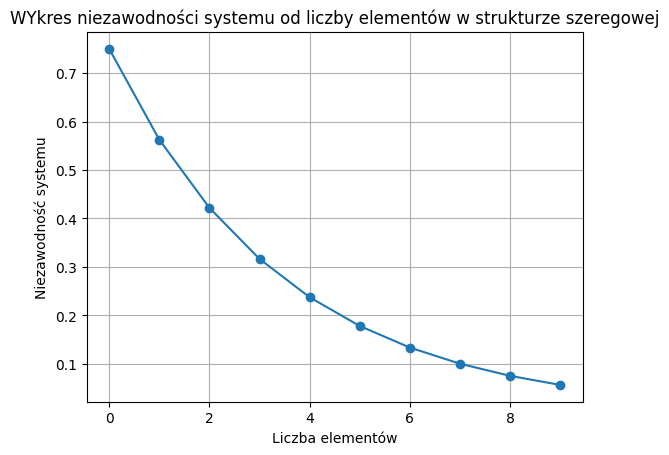

In [9]:
plt.plot(df["r"].cumprod(), 'o-')
plt.grid(True)
plt.xlabel("Liczba elementów")
plt.ylabel("Niezawodność systemu")
plt.title("Wykres niezawodności systemu od liczby elementów w strukturze szeregowej")
plt.show()

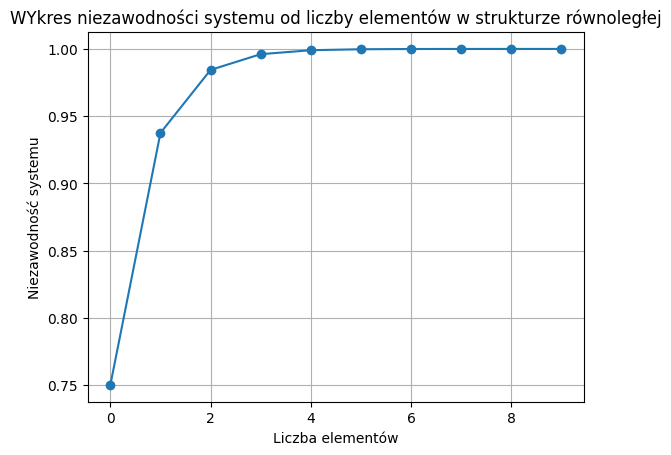

In [10]:
plt.plot(1 - df["invr"].cumprod(), "o-")
plt.grid(True)
plt.xlabel("Liczba elementów")
plt.ylabel("Niezawodność systemu")
plt.title("WYkres niezawodności systemu od liczby elementów w strukturze równoległej")
plt.show()

## Zad. 3.

Niezawodność systemu wynosi `0.7188874999999999`.
Dla 100 takich systemów, `71` z nich przypuszczalnie bedzie zdatna po czasie t.

In [11]:
r1=0.5
r2=0.7
r3=0.85
r4=0.9
r5=0.95

In [13]:
r1_szer = 1 - (1 - r1)*(1 - r2)
r1_szer

0.85

In [15]:
r3_szer = 1 - (1 - r4)*(1 - r5)
r3_szer

0.995

In [17]:
r_total = r1_szer * r3 * r3_szer
r_total

0.7188874999999999

# ZADANIA cz.2
## Zad. 4. 

Systemy o strukturze `szeregowo-równoległej` sa bardziej niezawodne.


In [23]:
df = pd.DataFrame(np.array(range(30, 85, 5)), columns=["nieza_el"]) / 100
df

,nieza_el
0,0.30
1,0.35
2,0.40
3,0.45
4,0.50
5,0.55
6,0.60
7,0.65
8,0.70
9,0.75


In [31]:
df["szer-row"] = (1-(1-df)**3)**2
df

,nieza_el,szer-row
0,0.30,0.431649
1,0.35,0.526169
2,0.40,0.614656
3,0.45,0.694931
4,0.50,0.765625
5,0.55,0.826054
6,0.60,0.876096
7,0.65,0.916088
8,0.70,0.946729
9,0.75,0.968994


In [41]:
df["row-szer"] = 1 - (1 - (df["nieza_el"]**3)) ** 2
df

,nieza_el,szer-row,row-szer
0,0.30,0.431649,0.053271
1,0.35,0.526169,0.083912
2,0.40,0.614656,0.123904
3,0.45,0.694931,0.173946
4,0.50,0.765625,0.234375
5,0.55,0.826054,0.305069
6,0.60,0.876096,0.385344
7,0.65,0.916088,0.473831
8,0.70,0.946729,0.568351
9,0.75,0.968994,0.665771


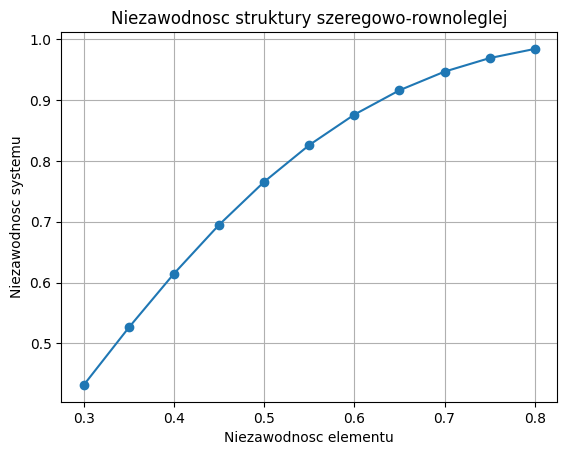

In [43]:
plt.plot(df["nieza_el"], df["szer-row"], "o-")
plt.ylabel("Niezawodnosc systemu")
plt.xlabel("Niezawodnosc elementu")
plt.title("Niezawodnosc struktury ")
plt.grid(True)
plt.show()

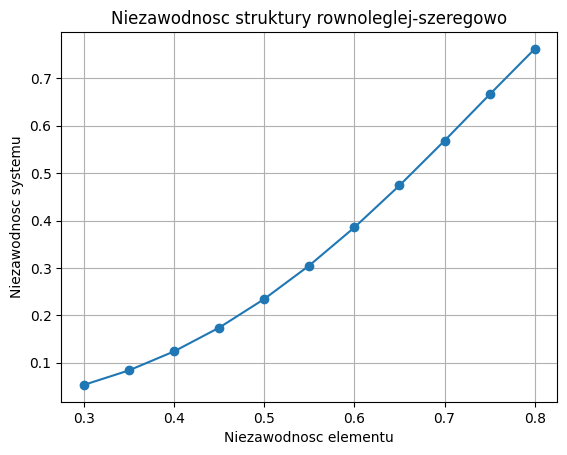

In [44]:
plt.plot(df["nieza_el"], df["row-szer"], "o-")
plt.ylabel("Niezawodnosc systemu")
plt.xlabel("Niezawodnosc elementu")
plt.title("Niezawodnosc struktury rownoleglej-szeregowo")
plt.grid(True)
plt.show()

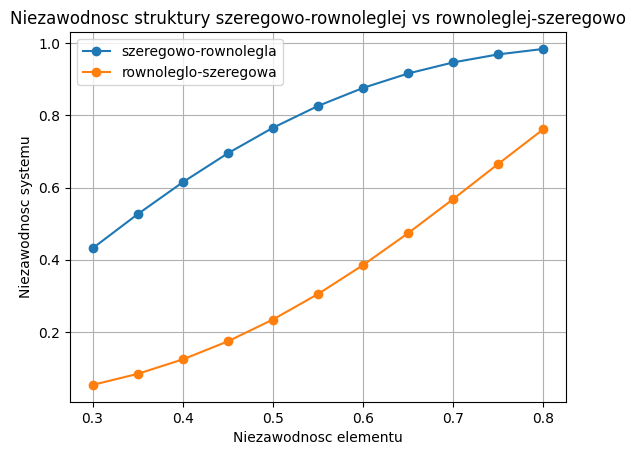

In [46]:
plt.plot(df["nieza_el"], df["szer-row"], "o-", label="szeregowo-rownolegla")
plt.plot(df["nieza_el"], df["row-szer"], "o-", label="rownoleglo-szeregowa")
plt.ylabel("Niezawodnosc systemu")
plt.xlabel("Niezawodnosc elementu")
plt.title("Niezawodnosc struktury szeregowo-rownoleglej vs rownoleglej-szeregowo")
plt.grid(True)
plt.legend()
plt.show()

## Zad. 5.
System cechuje sie struktura progowe 2z3 (przynaimniej 2 23 elementów musze byó zdatne). Sktada sie z trzech
takich samych elementów, kazdy ma niezawodnosé 0,7. Oblicz niezawodnost systemu.
[mozna obliczyé na kartce]
Niezawodnosé systemu wynosi UZUPELNIC


$$
\Pi
$$

In [47]:
rel = 0.7

In [50]:
3 * (rel **2) * (1-rel) + rel**3

0.7839999999999999

In [45]:
0.784

0.784